## 축구화 구매 사이트 크롤링

In [110]:
import numpy as np 
import pandas as pd 
import urllib.request
from urllib.parse import quote
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [111]:
base_url = 'http://www.soccerboom.co.kr'
sub_url = '/product/list.html?cate_no=243'
url = base_url + sub_url
with urllib.request.urlopen(url) as response:
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')

In [112]:
tmp = soup.select_one('.prdList.grid5')
lis = tmp.select('.thumbnail')
len(lis)

30

In [113]:
lis[0]

<div class="thumbnail">
<a href="/product/팬텀-gt-아카데미-df-se-tfda2263-0012263001/41292/category/243/display/1/" name="anchorBoxName_41292"><img alt="팬텀 GT 아카데미 DF SE TF(DA2263-001)(2263001)" id="eListPrdImage41292_1" src="//www.soccerboom.co.kr/web/product/medium/202011/b9a9fdce02ec79cafc5d6dd6e8707bc7.jpg"/></a>
<span class="wish"></span>
<div class="sale_rate" data-custom="119,000원" data-price="84,600원"></div>
</div>

In [114]:
prod_url = lis[0].find('a').attrs['href']
prod_url

'/product/팬텀-gt-아카데미-df-se-tfda2263-0012263001/41292/category/243/display/1/'

In [115]:
url = base_url + prod_url
with urllib.request.urlopen(quote(url.encode('utf8'), '/:')) as response:
    html = response.read()
    prd_soup = BeautifulSoup(html, 'html.parser')

#### 상품명

In [116]:
info = prd_soup.select_one('.infoArea')
word = info.find('h2').get_text().strip()[3:]
idx1 = word.find('(')
prd_name = word[3:idx1]
if ']' in prd_name:
    idx2 = prd_name.find(']')
    prd_name = prd_name[idx2+1:]
else:
    prd_name = word[:idx1]
prd_name

'팬텀 GT 아카데미 DF SE TF'

#### 제조사, 원산지, 원가, 판매가

In [117]:
prd_table = info.select_one('.prdTable')
specs = prd_table.find_all('tr')[1:5]
specs[0], specs[1], specs[2], specs[3]

(<tr class="xans-record-">
 <th scope="row"><span style="font-size:12px;color:#555555;">제조사</span></th>
 <td><span style="font-size:12px;color:#555555;">나이키</span></td>
 </tr>,
 <tr class="xans-record-">
 <th scope="row"><span style="font-size:12px;color:#555555;">원산지</span></th>
 <td><span style="font-size:12px;color:#555555;">인도네시아</span></td>
 </tr>,
 <tr class="xans-record-">
 <th scope="row"><span style="font-size:12px;color:#555555;">소비자가</span></th>
 <td><span style="font-size:12px;color:#555555;"><span id="span_product_price_custom"><strike>119,000원</strike></span></span></td>
 </tr>,
 <tr class="xans-record-">
 <th scope="row"><span style="font-size:12px;color:#008BCC;font-weight:bold;">판매가</span></th>
 <td><span style="font-size:12px;color:#008BCC;font-weight:bold;"><strong id="span_product_price_text">84,600원 </strong><input id="product_price" name="product_price" type="hidden" value=""/></span></td>
 </tr>)

In [118]:
manufacturer = specs[0].find('td').get_text()
origin = specs[1].find('td').get_text()
full_price = int(specs[2].find('td').get_text().replace(',', '').replace('원', ''))
disc_price = int(specs[3].find('td').get_text().strip().replace(',', '').replace('원', ''))
manufacturer, origin, full_price, disc_price

('나이키', '인도네시아', 119000, 84600)

#### 첫 번째 페이지

In [119]:
name_list = []; manufacturer_list = []; origin_list = []
full_price_list = []; disc_price_list = []
tmp = soup.select_one('.prdList.grid5')
lis = tmp.select('.thumbnail')
base_url = 'http://www.soccerboom.co.kr'
for li in tqdm_notebook(lis):
    #print(i)
    prod_url = li.find('a').attrs['href']
    url = base_url + prod_url
    with urllib.request.urlopen(quote(url.encode('utf8'), '/:')) as response:
        html = response.read()
        prd_soup = BeautifulSoup(html, 'html.parser')
    
    # 상품명
    info = prd_soup.select_one('.infoArea')
    word = info.find('h2').get_text().strip()[3:]
    idx1 = word.find('(')
    prd_name = word[3:idx1]
    if ']' in prd_name:
        idx2 = prd_name.find(']')
        prd_name = prd_name[idx2+1:]
    else:
        prd_name = word[:idx1]
    prd_name
    name_list.append(prd_name)

    # 제조사, 원산지, 원가, 판매가
    prd_table = info.select_one('.prdTable')
    specs = prd_table.find_all('tr')[1:5]
    manufacturer = specs[0].find('td').get_text()
    origin = specs[1].find('td').get_text()
    full_price = int(specs[2].find('td').get_text().replace(',', '').replace('원', ''))
    disc_price = int(specs[3].find('td').get_text().strip().replace(',', '').replace('원', ''))

    manufacturer_list.append(manufacturer); origin_list.append(origin)
    full_price_list.append(full_price); disc_price_list.append(disc_price)

In [120]:
print(name_list)

['팬텀 GT 아카데미 DF SE TF', '팬텀 GT 아카데미 SE TF', '울트라 4.1 TT', '레뷸라 컵 셀렉트 AS', '모나르시다 네오 셀렉트 AS', '프레데터 20.3 TF', '머큐리얼 베이퍼 13 아카데미 MDS TF', '모렐리아 살라 클래식 TF', '모렐리아 살라 클럽 TF', '모나르시다 네오 셀렉트 AS', '레뷸라 컵 셀렉트 AS', '모나르시다 네오 셀렉트 AS', '모렐리아 살라 클럽 TF', '엑스 고스티드.1 TF', '엑스 고스티드.3 LL TF', '엑스 고스티드.3 TF', '엑스 고스티드.4 TF', '엑스 고스티드.3 TF', '엑스 고스티드.4 TF', '울트라 3.1 TT', '울트라 3.1 TT', '울트라 4.1 TT', '퓨쳐 6.3 넷핏 TT', '퓨쳐 6.4 TT', '킹 프로 TT', '프레데터 20.4 TF', '네메시스 19.4 TF', '코파 20.1 TF', '프레데터 20.3 L TF', '네메시스 19.3 TF']


In [121]:
len(name_list)

30

In [122]:
print(manufacturer_list)

['나이키', '나이키', '푸마', '미즈노', '미즈노', '아디다스', '나이키', '미즈노', '미즈노', '미즈노', '미즈노', '미즈노', '미즈노', '아디다스', '아디다스', '아디다스', '아디다스', '아디다스', '아디다스', '푸마', '푸마', '푸마', '푸마', '푸마', '푸마', '아디다스', '아디다스', '아디다스', '아디다스', '아디다스']


In [123]:
len(manufacturer_list)

30

In [131]:
print(origin_list)

['인도네시아', '인도네시아', '베트남', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '중국', '캄보디아', '미얀마', '미얀마', '미얀마', '미얀마', '베트남', '베트남', '베트남', '국내 ', '캄보디아', '베트남', '인도네시아', '캄보디아', '인도네시아', '인도네시아', '베트남', '인도네시아', '미얀마', '인도네시아', '베트남', '인도네시아', '인도네시아', '인도네시아', '베트남', '인도네시아', '인도네시아', '중국', '인도네시아', '인도네시아', '캄보디아', '베트남', '인도네시아', '인도네시아', '인도네시아', '베트남', '인도네시아', '인도네시아', '인도네시아', '캄보디아', '캄보디아', '캄보디아', '베트남', '베트남', '베트남', '인도네시아', '캄보디아', '베트남', '베트남', '캄보디아', '미얀마', '인도네시아', '인도네시아', '베트남', '인도네시아', '미얀마', '캄보디아', '베트남', '인도네시아', '인도네시아', '중국', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '베트남', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '베트남', '중국', '미얀마', '캄보디아', '베트남', '미얀마', '인도네시아', '국내 ', '캄보디아', '미얀마', '인도네시아', '중국', '국내 ', '인도네시아', '인도네시아', '캄보디아', '캄보디아', '인도네시아', '미얀마', '인도네시아', '인도네시아', '캄보디아', '베트남', '인도네시아', '한국', '베트남', '베트남', '인도네시아', '인도네시아', '인도네시아', '인도네시아t', '인도네시아', '인도네시아', '인도네시아', '인도네시아', '베트남', '인도네시아', '인도네시아', 

#### 모든 페이지에 대해서 처리

In [209]:
base_url = 'http://www.soccerboom.co.kr'
sub_url = '/product/list.html?cate_no=243'
name_list = []; manufacturer_list = []; origin_list = []
full_price_list = []; disc_price_list = []
total_page = 5

In [210]:
for page in tqdm_notebook(range(total_page)):
    page_url = f'&page={page+1}'
    url = base_url + sub_url + page_url
    with urllib.request.urlopen(url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')

    tmp = soup.select_one('.prdList.grid5')
    lis = tmp.select('.thumbnail')
    for li in lis:
        prod_url = li.find('a').attrs['href']
        url = base_url + prod_url
        with urllib.request.urlopen(quote(url.encode('utf8'), '/:')) as response:
            html = response.read()
            prd_soup = BeautifulSoup(html, 'html.parser')

        # 상품명
        info = prd_soup.select_one('.infoArea')
        word = info.find('h2').get_text().strip()[3:]
        idx1 = word.find('(')
        prd_name = word[3:idx1]
        if ']' in prd_name:
            idx2 = prd_name.find(']')
            prd_name = prd_name[idx2+1:]
        else:
            prd_name = word[:idx1]
        prd_name
        name_list.append(prd_name)

        # 제조사, 원산지, 원가, 판매가
        prd_table = info.select_one('.prdTable')
        specs = prd_table.find_all('tr')[1:5]
        manufacturer = specs[0].find('td').get_text()
        full_price = int(specs[2].find('td').get_text().replace(',', '').replace('원', ''))
        disc_price = int(specs[3].find('td').get_text().strip().replace(',', '').replace('원', ''))
        origin = specs[1].find('td').get_text()
        if origin == '.':
            origin_list.append('알수없음')
        elif origin == '인도네시아t':
            origin_list.append('인도네시아')
        else:
            origin_list.append(origin)

        manufacturer_list.append(manufacturer)
        full_price_list.append(full_price); disc_price_list.append(disc_price)

In [211]:
# 데이터프레임에 넣을 리스트들의 길이가 같은지 확인
len(name_list), len(manufacturer_list), len(origin_list), len(full_price_list), len(disc_price_list)

(150, 150, 150, 150, 150)

In [212]:
product_df = pd.DataFrame({
    '상품명': name_list,
    '제조사': manufacturer_list,
    '원산지': origin_list,
    '원가': full_price_list,
    '할인가': disc_price_list
})

In [218]:
product_df['할인율(%)'] = round((product_df['원가'] - product_df['할인가']) / product_df['원가'] * 100, 2)

In [219]:
product_df.tail()

,상품명,제조사,원산지,원가,할인가,할인율(%)
145,DESTAQUE 4 K,아식스,알수없음,169000,78500,53.55
146,DESTAQUE 4 주니어,아식스,알수없음,129000,59500,53.88
147,R7 IN,키카,태국,59000,38900,34.07
148,R7 TANK KC,키카,태국,85000,59500,30.00
149,문디알 팀,아디다스,인도네시아,159000,99800,37.23


In [220]:
product_df.to_csv('../input/SoccerShoes.csv', sep=',', encoding='utf8', index=False)

### 시각화

In [221]:
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [222]:
df = pd.read_csv('../input/SoccerShoes.csv')
df.head()

,상품명,제조사,원산지,원가,할인가,할인율(%)
0,팬텀 GT 아카데미 DF SE TF,나이키,인도네시아,119000,84600,28.91
1,팬텀 GT 아카데미 SE TF,나이키,인도네시아,109000,77800,28.62
2,울트라 4.1 TT,푸마,베트남,69000,47000,31.88
3,레뷸라 컵 셀렉트 AS,미즈노,인도네시아,109000,77800,28.62
4,모나르시다 네오 셀렉트 AS,미즈노,인도네시아,79000,57200,27.59


In [223]:
df.groupby('제조사')[['상품명']].count()

,상품명
제조사,
나이키,34
뉴발란스,6
미즈노,26
아디다스,48
아식스,14
키카,5
푸마,17


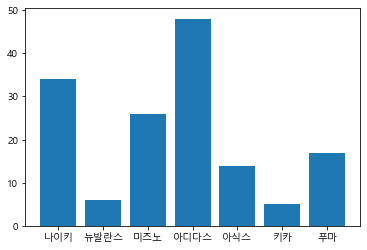

In [224]:
x = df.groupby('제조사')[['상품명']].count().index.tolist()
y = df.groupby('제조사')[['상품명']].count()['상품명'].tolist()
plt.bar(x, y); plt.show()

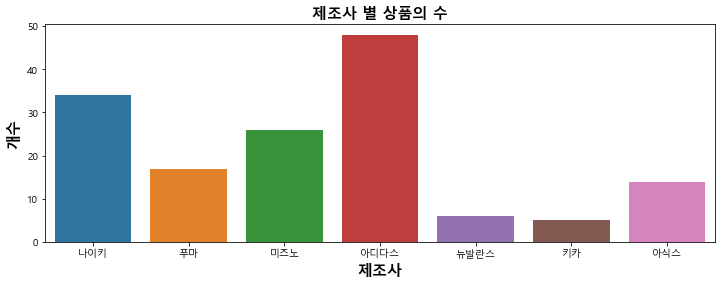

In [279]:
plt.figure(figsize=(12, 4))
sns.countplot(x='제조사', data=df)
font = {
    'weight': 'bold',
    'size': 15,
}
plt.xlabel('제조사', fontdict=font); plt.ylabel('개수', fontdict=font)
plt.title("제조사 별 상품의 수", fontdict=font)
plt.show()

In [280]:
df.groupby('원산지')[['상품명']].count()

,상품명
원산지,
국내,3
미얀마,11
베트남,30
알수없음,6
인도네시아,75
중국,5
캄보디아,15
태국,3
한국,2


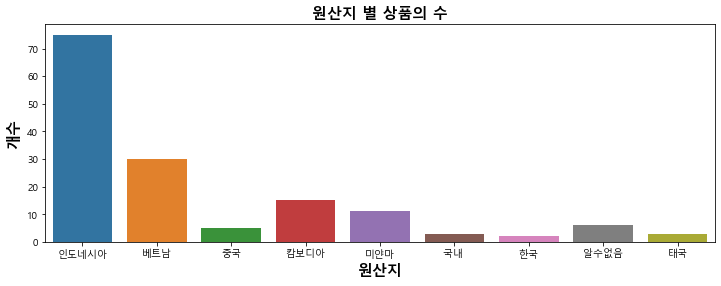

In [288]:
plt.figure(figsize=(12, 4))
sns.countplot(x='원산지', data=df)
font = {
    'weight': 'bold',
    'size': 15,
}
plt.xlabel('원산지', fontdict=font); plt.ylabel('개수', fontdict=font)
plt.title("원산지 별 상품의 수", fontdict=font)
plt.show()

In [282]:
# 제조사 별 평균 할인율
df[['제조사', '할인율(%)']].groupby(['제조사']).mean()

,할인율(%)
제조사,
나이키,32.641471
뉴발란스,48.135000
미즈노,29.770769
아디다스,36.399792
아식스,30.186429
키카,32.170000
푸마,32.351176


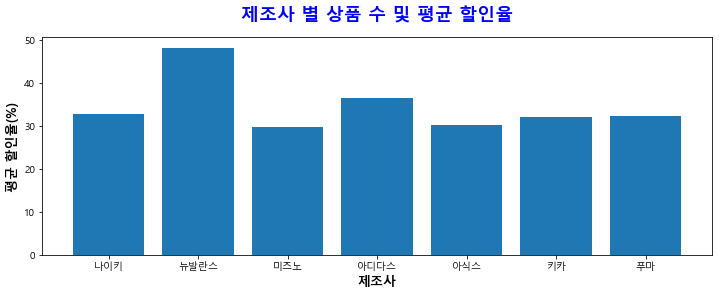

In [283]:
font = {
    'weight': 'bold',
    'size': 13,
}
plt.figure(figsize=(12, 4))
x = df.groupby('제조사')[['상품명']].count().index.tolist()
y = df[['제조사', '할인율(%)']].groupby(['제조사']).mean()['할인율(%)'].tolist()
plt.bar(x, y)
plt.title('제조사 별 상품수 및 평균 할인율', y=1.05, fontsize=18, weight='bold', color='blue')
plt.xlabel('제조사', fontdict=font); plt.ylabel('평균 할인율(%)', fontdict=font)
plt.show()

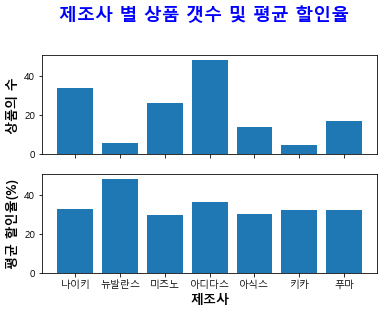

In [286]:
fig, axes = plt.subplots(2, 1, sharex=True)
for i in range(2):
    ax = axes[i]
    if i == 0:
        y = df.groupby('제조사')[['상품명']].count()['상품명'].tolist()
    else:
        y = df[['제조사', '할인율(%)']].groupby(['제조사']).mean()['할인율(%)'].tolist()
    ylabel = "상품의 수" if i == 0 else "평균 할인율(%)"
    ax.bar(x, y); ax.set_ylabel(ylabel, fontdict=font)

plt.suptitle('제조사 별 상품 갯수 및 평균 할인율', y=1.05, fontsize=18, weight='bold', color='blue')
plt.xlabel('제조사', fontdict=font)
plt.show()